In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

In [28]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]

In [35]:
import pandas as pd 
import numpy as np 
import numpy.random as random 
import scipy as sp

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

%precision 3

'%.3f'

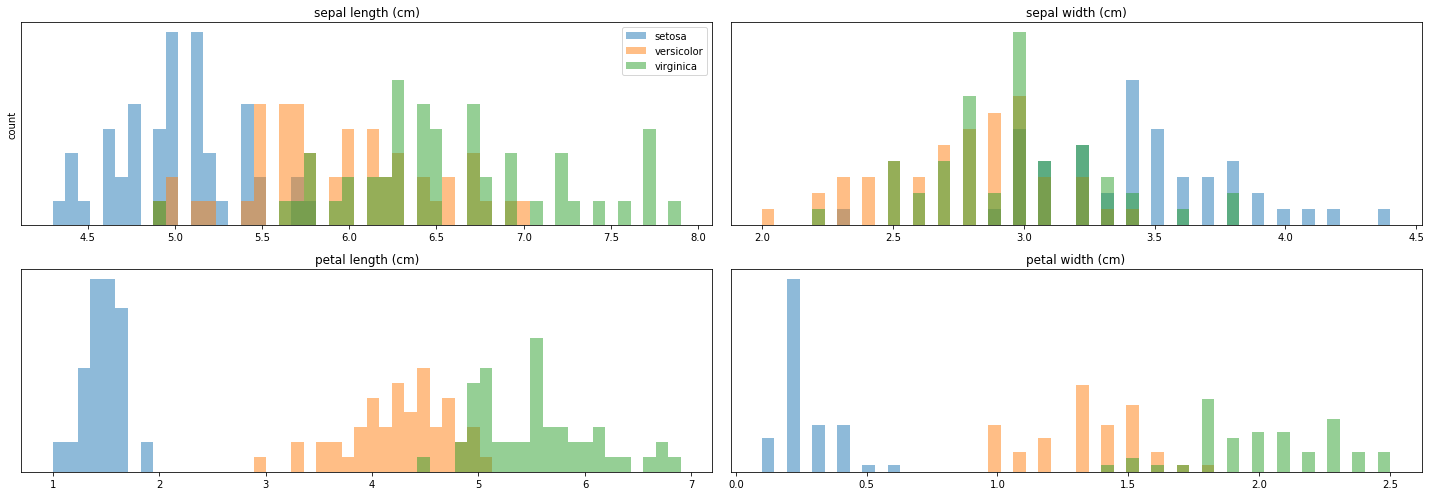

In [36]:
fig,axes = plt.subplots(2,2,figsize = (20,7))

ax = axes.ravel()

for i in range(4):
    _,bins =np.histogram(iris.data[:,i],bins=50)
    ax[i].hist(setosa[:,i],bins=bins,alpha=.5)
    ax[i].hist(versicolor[:,i],bins=bins,alpha=.5)
    ax[i].hist(virginica[:,i],bins=bins,alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
    
#ラベルの設定
ax[0].set_ylabel('count')
ax[0].legend(['setosa','versicolor','virginica'],loc='best')
fig.tight_layout()

In [39]:
sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

In [41]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca=pca.transform(X_std)

In [42]:
#次元を低くしたデータを可視化する
X_pca = pd.DataFrame(X_pca,columns=['pc1','pc2'])

#上のデータに目的変数(iris.target)を紐づける、横に結合する
X_pca = pd.concat([X_pca,pd.DataFrame(iris.target,columns=['target'])],axis=1)

pca_0=X_pca[X_pca['target']==0]
pca_1=X_pca[X_pca['target']==1]
pca_2=X_pca[X_pca['target']==2]

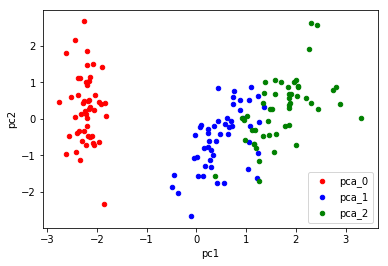

In [44]:
#プロット
ax = pca_0.plot.scatter(x='pc1',y='pc2',color='red',label='pca_0');

ax = pca_1.plot.scatter(x='pc1',y='pc2',color='blue',label='pca_1',ax=ax)

ax = pca_2.plot.scatter(x='pc1',y='pc2',color='green',label='pca_2',ax=ax)

In [45]:
X_pca

,pc1,pc2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
5,-2.075631,1.489178,0
6,-2.444029,0.047644,0
7,-2.232847,0.223148,0
8,-2.334640,-1.115328,0
9,-2.184328,-0.469014,0
